In [14]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [18]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    fft_image = np.fft.fft2(im)
    fft_kernel = np.fft.fft2(kernel, im.shape)#np.pad(kernel, ((0, im.shape(0) - im.shape(1))))
    fft_theorem = fft_image * fft_kernel
    fft_inv = np.fft.ifft2(fft_theorem).real

    conv_result = fft_inv

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2) 
        #
        plt.imshow(np.log(np.fft.fftshift(np.abs(fft_image))), cmap="gray")

        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.fft.fftshift(np.abs(fft_kernel)), cmap="gray")

        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log(np.fft.fftshift(np.abs(fft_theorem))), cmap="gray")


        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(utils.uint8_to_float(fft_inv), cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

C:\Users\nikla\AppData\Local\Temp/ipykernel_9196/2042591247.py:44: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.fft.fftshift(np.abs(fft_theorem))), cmap="gray")


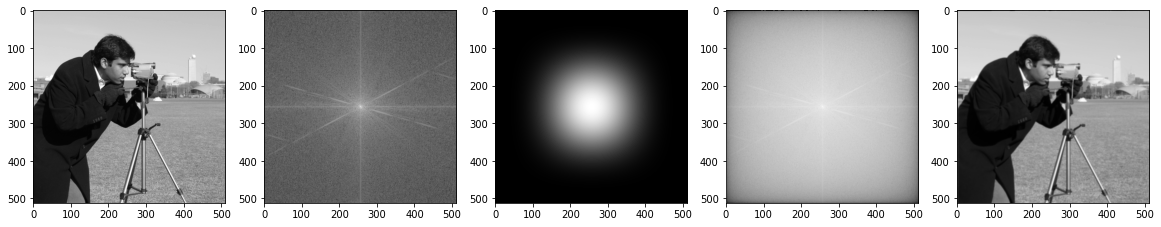

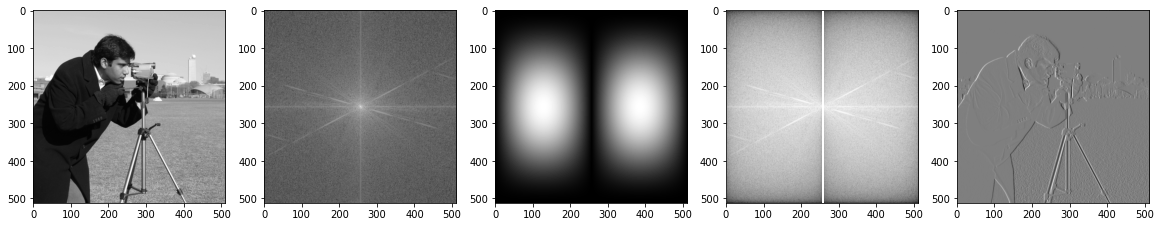

Saving image to: image_processed\camera_gaussian.png


c:\Users\nikla\OneDrive\datatek_sem_1\visuell_databehandling\task2\tdt4195_gvd\assignment_5\assignment 2\utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Saving image to: image_processed\camera_sobelx.png


In [19]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)